## generate image

In [ ]:
# -*- coding: utf-8 -*-

#读取pcap文件，解析相应的信息，为了在记事本中显示的方便，把二进制的信息

#import Image
from PIL import Image
#import re
import operator as op
#数学工具
import numpy as np

#np.set_printoptions(threshold = 1e6)     #  threshold表示输出数组的元素数目

################################################################################################################
file = open("train0_00100_20191206101840.txt","r")
list = file.readlines()
lists = []

for fields in list: 

	fields=fields.strip();

	fields=fields.strip("[]");

	fields=fields.split("|");
	#提取字节
	
	# #fields=str(fields)
	# #matchObj =re.match(r'\w', fields)
	# #print(fields)
	for field in fields:

		if (op.gt(field,'0/')and op.lt(field,'fg')):
			#print ("%s"%(field));
			lists.append(field)
			#保留字节（筛选00-ff之间的16进制字节），但意外保留的时间戳作为报文分割
			
# #for i in lists:
	# #if len(i)==24: lists.append('/')
	# #print ("--------------");
	# #if matchObj:
		# #lists.append(fields)
		
################################################################################################################
################################################################################################################
m=np.zeros((66000,169)) #生成一个空白（补零）二维数组保存报文字节，每行表示一条报文

j,k=-1,0 #j从-1开始用来解决一上来就存在的时间戳计数，k为字节计数
flag=1 #用于分割报文标志

#以下内容将报文不满784字节补零（纯黑），超出的舍弃
for i in range(len(lists)):#len(lists)
	if len(lists[i])!=24 and flag == 1:
		m[j][k]=int(lists[i],16) #16进制转换成10进制
		k = k + 1
        ################################################################################################################
		if k == 169:
			#j = j + 1
			#k = 0
			flag = 0
			#continue
	elif len(lists[i])==24:
		j = j + 1
		k = 0
		flag = 1
		
# #m = m[1:]
# #print(m)
# #print(lists)

################################################################################################################
ftxt = open('train0_cip.txt','a') #用于记录图片名称及标签

################################################################################################################
for i in range(len(m)):#len(m)
    ################################################################################################################
	m1=m[i].reshape([13,13]) #784字节为MNIST手写数字识别（0-9）28*28像素输入格式，不同于此、流量分类只有两种输出选项（0、1）
	img=Image.fromarray(m1)
	img=img.convert('L') #将一行数组存成灰度图，用0-255表示，255表示纯白（归一化后为1）
	#img.show()
################################################################################################################
################################################################################################################
	lt='\\'+str(3*i+0)+'_0.jpg' #偶数表示正常流量、奇数代表异常流量，最后随机打乱图片顺序
	ftxt.write(str(3*i+0)+'_0.jpg'+' 0'+'\n') #图片名+标签，用空格分隔
	img.save(r'C:\Users\Liu Yi\work\project'+lt) #照片保存路径分两部分表示，因其包含变量

ftxt.close()

#import numpy as np
#生成一个数组，维度为100*100，灰度值一定比255大
#narray=np.array([range(10000)],dtype='int')
#narray=narray.reshape([100,100])

# #调用Image库，数组归一化
# #img=Image.fromarray(narray*255.0/9999)
# #m = m/255
# m1=m[42].reshape([28,28])
# #print (m1)
# img=Image.fromarray(m1)
# #img=Image.fromarray(m1*1)
# #转换成灰度图
# img=img.convert('L')
# #print(narray)
# #可以调用Image库下的函数了，比如show()
# #img.show()

# lt=42
# lt='\\'+str(lt)+'_1.jpg'
# print(lt)
# img.save(r'C:\Users\Liu Yi\work\mydata_jpg'+lt)

# #Image类返回矩阵的操作
# imgdata=np.matrix(img.getdata(),dtype='float')
# imgdata=imgdata.reshape(narray.shape[0],narray.shape[1])
# #图像归一化，生成矩阵
# nmatrix=imgdata*9999/255.0


#im=Image.open('0.png')
#a=np.asarray(im)
#print(a)

## generate dataset

In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os

train_path = './swat_image_label/swat_train_jpg_60000/'
train_txt = './swat_image_label/swat_train_jpg_60000.txt'
x_train_savepath = './swat_image_label/swat_x_train.npy'
y_train_savepath = './swat_image_label/swat_y_train.npy'

test_path = './swat_image_label/swat_test_jpg_10000/'
test_txt = './swat_image_label/swat_test_jpg_10000.txt'
x_test_savepath = './swat_image_label/swat_x_test.npy'
y_test_savepath = './swat_image_label/swat_y_test.npy'

def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_


if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

-------------Load Datasets-----------------


Please first generate .npy file. Since its' sample will be ~100MB, I will not upload it on github.

## train deep learning model, acc from 1/2 since 2 labels

Epoch 1/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6702 - sparse_categorical_accuracy: 0.6008 - val_loss: 0.6288 - val_sparse_categorical_accuracy: 0.6319
Epoch 2/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5351 - sparse_categorical_accuracy: 0.7213 - val_loss: 0.4582 - val_sparse_categorical_accuracy: 0.8167
Epoch 3/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4094 - sparse_categorical_accuracy: 0.8270 - val_loss: 0.3492 - val_sparse_categorical_accuracy: 0.8656
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3096 - sparse_categorical_accuracy: 0.8880 - val_loss: 0.3161 - val_sparse_categorical_accuracy: 0.8659
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2366 - sparse_categorical_accuracy: 0.9215 - val_loss: 0.2331 - val_sparse_categorical_accuracy: 0.9064
Model: "sequential_1"
_________________________________________________________________
Layer (

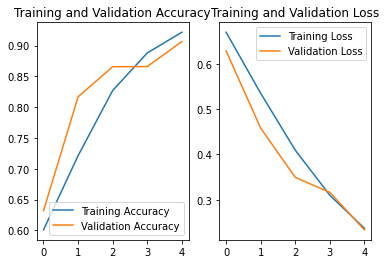

In [3]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)
'''#MNIST 示例
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')#3 label or 2 label, 2 label should use sigmod activation
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

#断点续训
checkpoint_save_path = "./checkpoint/swat.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])#can change batch=128 and epoch=10
model.summary()
'''#参数提取
print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()
'''
###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## load the model and continues train

-------------load the model-----------------
Epoch 1/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1819 - sparse_categorical_accuracy: 0.9440 - val_loss: 0.2409 - val_sparse_categorical_accuracy: 0.9069
Epoch 2/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1456 - sparse_categorical_accuracy: 0.9567 - val_loss: 0.1828 - val_sparse_categorical_accuracy: 0.9275
Epoch 3/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.1718 - val_sparse_categorical_accuracy: 0.9368
Epoch 4/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0985 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.1617 - val_sparse_categorical_accuracy: 0.9368
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.1426 - val_sparse_categorical_accuracy: 0.9504
Model: "sequential_2"
____________________________

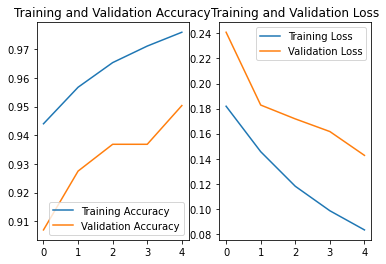

In [4]:
#-------------load the model-----------------
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)
'''#MNIST 示例
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')#3 label or 2 label, 2 label should use sigmod activation
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

#断点续训
checkpoint_save_path = "./checkpoint/swat.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])#can change batch=128 and epoch=10
model.summary()
'''#参数提取
print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()
'''
###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## app & Visualization for test set, actually the test set before can be called validation set

input the number of test pictures:4
the path of test picture:13102_0.jpg


[0]


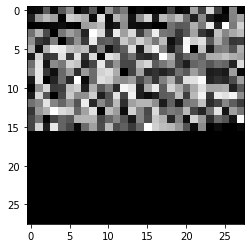

the path of test picture:10606_1.jpg


[1]


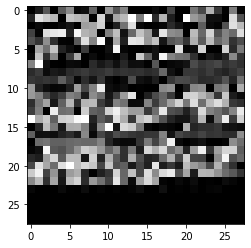

the path of test picture:12702_0.jpg


[0]


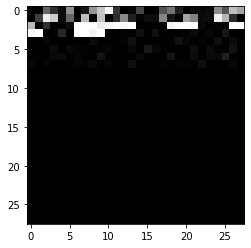

the path of test picture:12700_1.jpg


[1]


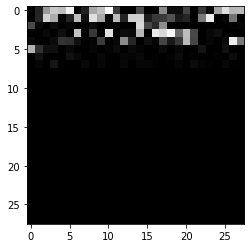

In [6]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_save_path = './checkpoint/swat.ckpt'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.load_weights(model_save_path)
preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    image_path = input("the path of test picture:")
    img = Image.open(image_path)

    image = plt.imread(image_path)
    plt.set_cmap('gray')
    plt.imshow(image)

    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]
    result = model.predict(x_predict)
    pred = tf.argmax(result, axis=1)

    print('\n')
    tf.print(pred)

    plt.pause(1)
    plt.close()

## CNN baseline with other metrics

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

#np.set_printoptions(threshold=np.inf)
x_train_savepath = './swat_x_train.npy'
y_train_savepath = './swat_y_train.npy'

x_test_savepath = './swat_x_test.npy'
y_test_savepath = './swat_y_test.npy'

x_train = np.load(x_train_savepath)
y_train = np.load(y_train_savepath)
x_test = np.load(x_test_savepath)
y_test = np.load(y_test_savepath)

#print("x_train.shape", x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度，使数据和网络结构匹配
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#print("x_train.shape", x_train.shape)


class Baseline(Model):#here to change model Architecture
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        #self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        #self.d1 = Dropout(0.2)  # dropout层
        '''
        self.c2 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        #self.b1 = BatchNormalization()  # BN层
        self.a2 = Activation('relu')  # 激活层
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        #self.d1 = Dropout(0.2)  # dropout层
        '''
        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        #self.d3 = Dropout(0.2)
        self.f2 = Dense(3, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        #x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        #x = self.d1(x)
        '''
        x = self.c2(x)
        #x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        #x = self.d2(x)
        '''

        x = self.flatten(x)
        x = self.f1(x)
        #x = self.d3(x)
        y = self.f2(x)
        return y


model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy',tf.keras.metrics.AUC(curve='ROC', name = 'auc')])#here for other metrics

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()
'''
# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()
'''
###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
#gernerate metrics using y_true & y_pred
def cal_base(y_true, y_pred):
    y_pred_positive = K.round(K.clip(y_pred, 0, 1))
    y_pred_negative = 1 - y_pred_positive

    y_positive = K.round(K.clip(y_true, 0, 1))
    y_negative = 1 - y_positive

    TP = K.sum(y_positive * y_pred_positive)
    TN = K.sum(y_negative * y_pred_negative)

    FP = K.sum(y_negative * y_pred_positive)
    FN = K.sum(y_positive * y_pred_negative)

    return TP, TN, FP, FN


def acc(y_true, y_pred):
    TP, TN, FP, FN = cal_base(y_true, y_pred)
    ACC = (TP + TN) / (TP + FP + FN + TN + K.epsilon())
    return ACC


def sensitivity(y_true, y_pred):
    """ recall """
    TP, TN, FP, FN = cal_base(y_true, y_pred)
    SE = TP/(TP + FN + K.epsilon())
    return SE


def precision(y_true, y_pred):
    TP, TN, FP, FN = cal_base(y_true, y_pred)
    PC = TP/(TP + FP + K.epsilon())
    return PC


def specificity(y_true, y_pred):
    TP, TN, FP, FN = cal_base(y_true, y_pred)
    SP = TN / (TN + FP + K.epsilon())
    return SP


def f1_socre(y_true, y_pred):
    SE = sensitivity(y_true, y_pred)
    PC = precision(y_true, y_pred)
    F1 = 2 * SE * PC / (SE + PC + K.epsilon())
    return F1

In [ ]:
#gernerate metrics using y_true & y_pred
'''
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
'''
def metric_precision(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-(y_pred)))
    FP=tf.reduce_sum((1-y_true)*(y_pred))
    FN=tf.reduce_sum(y_true*(1-(y_pred)))
    precision=TP/(TP+FP)
    return precision

#召回率评价指标
def metric_recall(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-(y_pred)))
    FP=tf.reduce_sum((1-y_true)*(y_pred))
    FN=tf.reduce_sum(y_true*(1-(y_pred)))
    recall=TP/(TP+FN)
    return recall

#F1-score评价指标
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-(y_pred)))
    FP=tf.reduce_sum((1-y_true)*(y_pred))
    FN=tf.reduce_sum(y_true*(1-(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score